<a href="https://colab.research.google.com/github/schwallergroup/ai4chem_course/blob/scikit_learn/notebooks/02%20-%20Supervised%20Learning/training_and_evaluating_ml_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 tutorial - AI 4 Chemistry

## Index:

- Regression
    - scikit-learn
    - 
- Classification


### TODO

# 0. Software
### Scikit-learn
Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. It is widely used in industry and academia, and a wealth of tutorials and code snippets are available online.
We will learn to use scikit-learn to do machine learning work. You can also browse the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and [tutorials](https://scikit-learn.org/stable/tutorial/index.html) for additional details.
### Essential Libraries and Tools 
Scikit-learn depends on two other Python packages, NumPy and SciPy. For plotting and interactive development, you should also install matplotlib, IPython, and the Jupyter Notebook.
- **NumPy** is one of the fundamental packages for scientific computing in Python. It contains functionality for multidimensional arrays, high-level mathematical functions such as linear algebra operations and the Fourier transform, and pseudorandom number generators. In scikit-learn, the NumPy array is the fundamental data structure. scikit-learn takes in data in the form of NumPy arrays. Any data you’re using will have to be converted to a NumPy array.
- **SciPy** is a collection of functions for scientific computing in Python. It provides, among other functionality, advanced linear algebra routines, mathematical function optimization, signal processing, special mathematical functions, and statistical distributions. scikit-learn draws from SciPy’s collection of functions for implementing its algorithms.
- **Matplotlib** is the primary scientific plotting library in Python. It provides functions for making publication-quality visualizations such as line charts, histograms, scatter plots, and so on.
- **Pandas** Python library for data wrangling and analysis. It is built around a data structure called the DataFrame that is similar to an Excel spreadsheet. It can ingest from a great variety of file formats and databases, like SQL, Excel files, and comma-separated values (CSV) files.

### XGBoost
XGBoost (eXtreme Gradient Boosting) is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. You can also browse the [XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/) for additional details.

### DeepChem
DeepChem is a high quality open-source toolchain that democratizes the use of deep-learning in chemistry, biology and materials science. It also provides various tools for dataset loader, splitters, molecular featurization, model construction and hyperparameter tuning. You can also browse the [DeepChem Ducumentation](https://deepchem.readthedocs.io/en/latest/) for additional details.

We will first install the required libraries. We also need `RDKit` library to process and analyze molecules, like calculating molecular descriptors.

In [1]:
!pip install numpy scipy matplotlib scikit-learn pandas rdkit xgboost deepchem

# 1. Introduction to Machine learning
Machine learning (ML) is a field of inquiry devoted to understanding and building methods that "learn" – that is, methods that leverage data to improve performance on some set of tasks. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so.

<div align="center">
<img src="https://s3.ap-southeast-1.amazonaws.com/files-scs-prod/public%2Fimages%2F1605842918803-AI+vs+ML+vs+DL.png" width="500"/>
</div>

Machine learning approaches are traditionally divided into three broad categories, depending on the nature of the "signal" or "feedback" available to the learning system:
- **Supervised learning**: The computer is presented with example inputs and their desired outputs, given by a "teacher", and the goal is to learn a general rule that maps inputs to outputs.
- **Unsupervised learning**: No labels are given to the learning algorithm, leaving it on its own to find structure in its input. Unsupervised learning can be a goal in itself (discovering hidden patterns in data) or a means towards an end (feature learning).
- **Reinforcement learning**: A computer program interacts with a dynamic environment in which it must perform a certain goal (such as driving a vehicle or playing a game against an opponent). As it navigates its problem space, the program is provided feedback that's analogous to rewards, which it tries to maximize.

<div align="center">
<img src="https://starship-knowledge.com/wp-content/uploads/2021/01/unsupervised_supervised_reinforcement.jpeg" width="500"/>
</div>

# 2. Supervised learning
Two major types of supervised machine learning problems:
- **Classification** task is to predict a class label, which is a choice from a predefined list of possibilities. For example, to determine whether the photo is a dog, a cat or a rabbit.
- **Regression** task is to predict a continuous number, or a floating-point number in programming terms (or real number in mathematical terms), like predicting a person’s annual income from their education, their age, and where they live.

<div align="center">
<img src="https://cdn-images-1.medium.com/max/1600/1*xs6Jr4iAPvoqszF9JgDWOA.png" width="500"/>
</div>

## Common algorithms
- k-Nearest Neighbors (k-NN)
- Linear Models
- Support Vector Machines
- Decision Trees
- Ensembles of Decision Trees
  - Random forests
  - Gradient boosting machines

We can use `scikit-learn` to create ML models of different algorithms.

In [2]:
# k-NN classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3) # instantiate the model and set the number of neighbors to consider to 3

# k-NN regressor
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=3) # instantiate the model and set the number of neighbors to consider to 3

# linear regressor
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# decision tree classifier & regressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
tree_clf = DecisionTreeClassifier()
tree_reg = DecisionTreeRegressor()

# random forest classifier & regressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
ranf_clf = RandomForestClassifier(n_estimators=10)  # using 10 trees
ranf_reg = RandomForestRegressor(n_estimators=10)  # using 10 trees

# XGBoost classifier & regressor
# from xgboost import XGBClassifier, XGBRegressor
# bst_clf = XGBClassifier(n_estimators=10)  # using 10 trees
# bst_reg = XGBRegressor(n_estimators=10)  # using 10 trees



## Common steps
1. Prepare data & split data
2. Choose the model
3. Train the model
4. Evaluate the model
5. Use the model

Below is a simple example to show basic steps of machine learning. Our goal is to build a machine learning model that can learn from the measurements (the length and width of the petals and the length and width of the sepals) of these irises whose species is known, so that we can predict the species for a new iris.

In [3]:
# load a dataset

from sklearn.datasets import load_iris
iris_dataset = load_iris()

# Get the information of this dataset
print(iris_dataset['DESCR'][:193] + "\n...\n")
print("Shape of data:", iris_dataset['data'].shape)
print("Shape of target:", iris_dataset['target'].shape)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...

Shape of data: (150, 4)
Shape of target: (150,)


Below is a simple example to show basic steps of machine learning. Our goal is to build a machine learning model that can learn from chemical structures (as encoded in SMILES strings) to predict water solubility. We will use ESOL dataset from [MoleculeNet](https://doi.org/10.1039/C7SC02664A) to train the models. 

Load dataset & show data

In [4]:
import pandas as pd

# load dataset from a CSV file
esol_df = pd.read_csv('../data/esol.csv')
esol_df


,smiles,log solubility (mol/L)
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.770
1,Cc1occc1C(=O)Nc2ccccc2,-3.300
2,CC(C)=CCCC(C)=CC(=O),-2.060
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.870
4,c1ccsc1,-1.330
...,...,...
1123,FC(F)(F)C(Cl)Br,-1.710
1124,CNC(=O)ON=C(SC)C(=O)N(C)C,0.106
1125,CCSCCSP(=S)(OC)OC,-3.091
1126,CCC(C)C,-3.180


The original dataset contains 2 columns, where the `smiles` column represents the SMILES strings of the solute molecules. The column `log solubility (mol/L)` represents the solubility of molecules in water, which is the predicted target of our task.

In [5]:
smiles = esol_df['smiles'].values
y = esol_df['log solubility (mol/L)'].values

We need to convert the SMILES strings of molecules into numerical values that can be used as input to the ML models. We can calculate molecular descirptors from SMILES strings by some software like `RDKit`, `DeepChem` and [Mordred](https://github.com/mordred-descriptor/mordred). Here we use DeepChem [Featurizers](https://deepchem.readthedocs.io/en/latest/api_reference/featurizers.html) to compute molecular descriptors.

In [6]:
# Here, we use molecular descriptors from RDKit, like molecular weight, number of valence electrons, maximum and minimum partial charge, etc.
from deepchem.feat import RDKitDescriptors
featurizer = RDKitDescriptors()
features = featurizer.featurize(smiles)
print("Number of molecular descriptors:", features.shape[1])

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading some PyTorch models, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'torch'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


Number of molecular descriptors: 208


Data preprocessing

In [7]:
import numpy as np

# Min-Max Normalization of features
fea_max = features.max(axis=0)
fea_min = features.min(axis=0)
fea_norm = (features - fea_min) / (fea_max - fea_min)

# Check if normalized features contain invalid values
contain_nan = (True in np.isnan(fea_norm))
if contain_nan:
    print('Our normalized features contain invalid values, please delete them before model training!')
    fea_norm = fea_norm[:, ~np.isnan(fea_norm).any(axis=0)]
    print('Dropping of columns containing invalid values has been completed.')
else:
    print('Our normalized features do not contain invalid values.')
print("Shape of molecular descriptors after data preprocessing:", fea_norm.shape[1])

Our normalized features contain invalid values, please delete them before model training!
Dropping of columns containing invalid values has been completed.
Shape of molecular descriptors after data preprocessing: 189


/tmp/ipykernel_222358/2339492829.py:6: RuntimeWarning: invalid value encountered in divide
  fea_norm = (features - fea_min) / (fea_max - fea_min)


Dataset split

In [8]:
from sklearn.model_selection import train_test_split
X = fea_norm
# train data size : test data size = 0.8 : 0.2
# fixed seed using the random_state parameter, so it always has the same split.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0)

Create models

In [9]:
# random forest regressor, and the criterion is mean squared error (MSE)
from sklearn.ensemble import RandomForestRegressor
ranf_reg = RandomForestRegressor(n_estimators=50, random_state=0)  # using 50 trees and seed=0

# XGBoost regressor
from xgboost import XGBRegressor
bst_reg = XGBRegressor(n_estimators=50, random_state=0)  # using 50 trees and seed=0

ModuleNotFoundError: No module named 'xgboost'

Train and evaluate the models

In [10]:
# for random forests
ranf_reg.fit(X_train, y_train)  # train the model
ranf_train_mse = ranf_reg.score(X_train, y_train)
ranf_test_mse = ranf_reg.score(X_test, y_test)
ranf_train_rmse = ranf_train_mse ** 0.5
ranf_test_rmse = ranf_test_mse ** 0.5
print('Random forests performance:')
print('RMSE on train set: {:.3f}, and test set: {:.3f}.\n'.format(ranf_train_rmse, ranf_test_rmse))

# for XGBoost
bst_reg.fit(X_train, y_train)  # train the model
y_pred_train = bst_reg.predict(X_train)
y_pred_test = bst_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
bst_train_mse = mean_squared_error(y_pred_train, y_train)
bst_test_mse = mean_squared_error(y_pred_test, y_test)
bst_train_rmse = bst_train_mse ** 0.5
bst_test_rmse = bst_test_mse ** 0.5
print('XGBoost performance:')
print('RMSE on train set: {:.3f}, and test set: {:.3f}.'.format(bst_train_rmse, bst_test_rmse))

Random forests performance:
RMSE on train set: 0.993, and test set: 0.950.



NameError: name 'bst_reg' is not defined

The results show that the RMSE value of XGBoost on the test set is smaller, indicating that the XGBoost is more accurate than random forests on this task.

# Introduction to traditional ML.

## Supervised learning

Training a model to take inputs X and return output y.

As you have seen in class, for this type of learning, we have two variants:

- Classification
- Regression

Linear regression is one example of suppervised learning for regression.

# Regression

### TODO: Improve this introduction based on the ESOL paper, why is solub. prediction important?

One problem in both academic and industrial chemistry is predicting solubility. For instance we might know that some molecule has good potential as a ligand for some relevant reaction, however when you synthesize it, you realize it's not soluble under your already optimized reaction conditions! 😥

It would be extremely useful to know the solubility of my molecule, **before I even try to synthesize it**!

---

In this task we will try to solve this using supervised learning. In particular, we will train a regression model using the very convenient [scikit-learn](https://www.kaggle.com/competitions/MerckActivity/data) Python library, to predict solubility based on some molecular descriptors.

In [ ]:
# TODO: Let's start with loading the data, visualizing some molecules and their solubility
# Let's also see some stats. e.g. size of dataset, distribution of solubility, etc.

# TODO: Generate features
# TODO do a train/test split

In [ ]:
# TODO: Let's give an introduction to scikit learn by doing a simple linear regression and see the results.
# TODO Introduce sckit-learn, and use a RF model for this.
import tempfile
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsTransformer
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
cache_path = tempfile.gettempdir()  # we use a temporary folder here
X, _ = make_regression(n_samples=50, n_features=25, random_state=0)
estimator = make_pipeline(
    KNeighborsTransformer(mode='distance'),
    Isomap(n_components=3, metric='precomputed'),
    memory=cache_path)
X_embedded = estimator.fit_transform(X)
X_embedded.shape

In [ ]:
# TODO: Let's train another model (this can be an excercise)

# EXERCISE: Implement random forest and and XGBoost models using scikit learn

# As we see, there are many possible models we can use for this task. But which one is better?

In addition, each model has a set of hyperparameters that we need to tune ourselves. How do we select them?

This is an important part of machine learning! What we want to know is: What is the best combination of model + model hyperparameters for our task? 
As you've seen in the course, common strategies to evaluate and compare model's performance include:

- Splitting dataset in train/validation/test.
- Doing cross-validation for hyperparameter tuning.

In [ ]:
# TODO: Split data in train/valid/test

# Retrain the models on the train set, and compare them using the validation set.

# What model is the best?

In [ ]:
# TODO: Let's do cross-validation

# Optimize the hyperparameters for XGBoost, and again compare performance

In [ ]:
# TODO: Finally, compare all models on the test set.
# Explain that test set should never be seen by models.
# This is all completely new data so we know how it would work in real life.

---

# Classification

We now turn our attention towards the other type of supervised learning: classification.

Many questions in chemistry can be framed as a classification task: 

- Will this molecule act as a nucleophile or electrophile in my reaction?
- What is the smell of this substance? (fruity, citrus, sweet, ...)

But in this tutorial we will try to respond:

<div>
<img src="img/is_this_toxic.png" width="500"/>
</div>


---

## For this, we need data. [MoleculeNet](https://moleculenet.org/datasets-1) provides several datasets, and we'll work with `ClinTox` for prediction of toxicity.

ClinTox is a dataset containing `qualitative data of drugs approved by the FDA and those that have failed clinical trials for toxicity reasons`.

Let's see if one of our models can tell what molecules are toxic!

This is super useful for instance in drug discovery, where we want to know if a molecule has potential as a drug, **even before we synthesize it**.

The steps we follow are similar to those we saw for regression:

1. Prepare & split data
2. Choose a model
3. Train the model
4. Evaluate the model
5. Use the model

In [66]:
import pandas as pd

# Load clintox data from the data directory and see what it contains
df_toxicity = pd.read_csv("data/clintox.csv")
print(df_toxicity.head(3))

                                              smiles  FDA_APPROVED  CT_TOX
0            *C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC             1       0
1  [C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...             1       0
2  [C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...             1       0


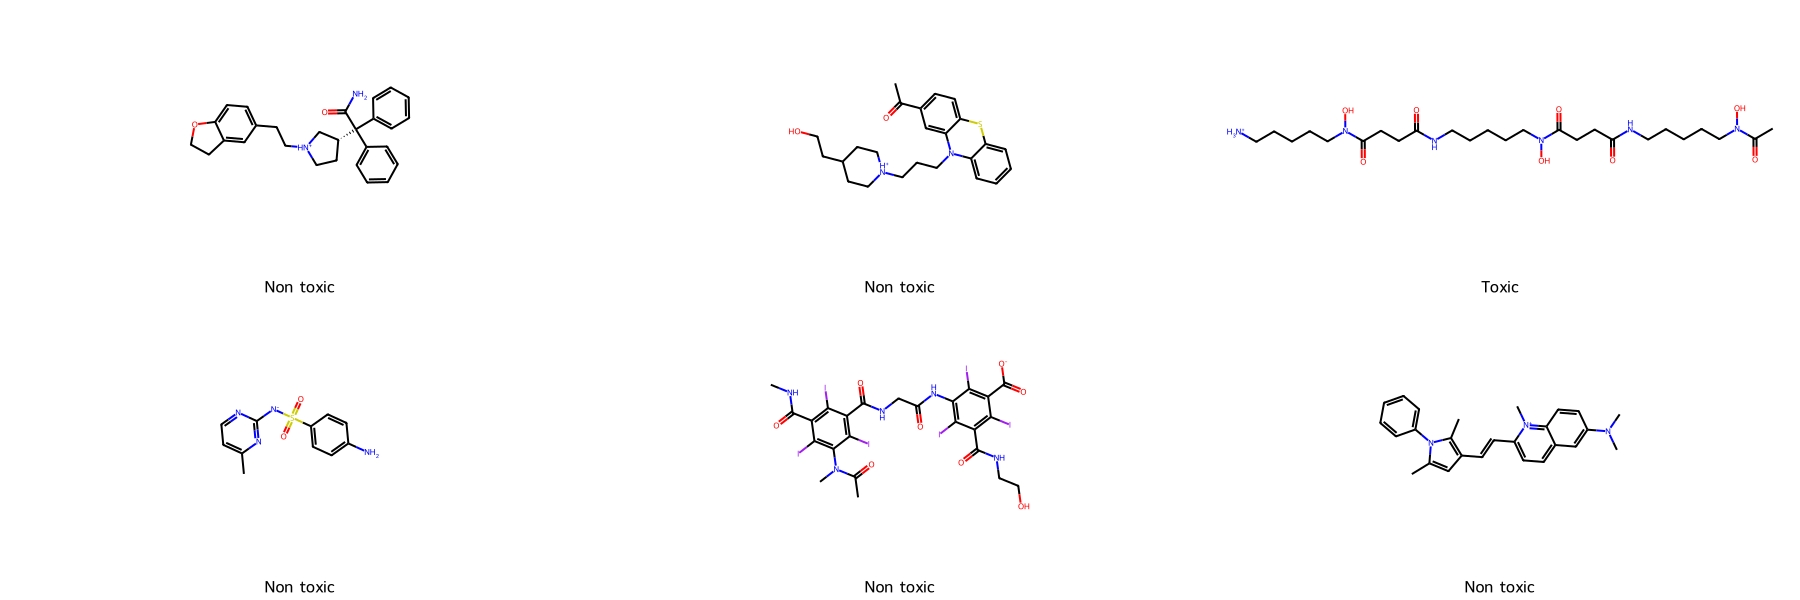

In [67]:
from rdkit import Chem
from rdkit.Chem import Draw

# Visualize some of the molecules of this dataset
n=6
smiles = df_toxicity.smiles.sample(n).values
legend = df_toxicity.CT_TOX.sample(n).values
molecs = [Chem.MolFromSmiles(s) for s in smiles]

Draw.MolsToGridImage(
    molecs,
    subImgSize=(600,300),
    legends=["Toxic" if i==1 else "Non toxic" for i in legend]
)

In [68]:
# How many toxic molecules are in the dataset?
counts = df_toxicity["CT_TOX"].value_counts()

print(f"The dataset contains {counts.sum()} molecules; {counts.iloc[1]} of them are toxic.")

The dataset contains 1484 molecules; 112 of them are toxic.


## Now, we will calculate some molecular descriptors using the [mordred package](http://mordred-descriptor.github.io/documentation/master/descriptors.html).

This can take a while (how much??), you can use this time to explore a bit the more than 1600 descriptors from mordred!

In [134]:
from rdkit import Chem
from deepchem.feat import MordredDescriptors

featurizer = MordredDescriptors(ignore_3D=True)
features = featurizer.featurize(smiles)
print("Number of molecular descriptors:", features.shape[1])

X = df_toxicity.smiles.apply(lambda x: featurizer.featurize(x))
y = df_toxicity.CT_TOX

Number of molecular descriptors: 1613


[14:59:20] Explicit valence for atom # 0 N, 5, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
[15:00:02] Can't kekulize mol.  Unkekulized atoms: 9
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:
    CanonicalRankAtoms(RDKit::ROMol mol, bool breakTies=True, bool includeChirality=True, bool includeIsotopes=True)
[15:02:47] Explicit valence for atom # 10 N, 4, is greater than permitted
Failed to featurize datapoint 0, None. Appending empty array
Exception message: Python argument types in
    rdkit.Chem.rdmolfiles.CanonicalRankAtoms(NoneType)
did not match C++ signature:

In [189]:
# As you see from the warnings, mordred couldn't calculate features for a few molecules (but don't worry!)
# Remove these molecules from the dataset

X =mols
y = df_toxicity.CT_TOX

missing = X.apply(lambda x: x.shape == (1, features.shape[1]))

print(f"Dropping {(~missing).sum()} molecules that couldn't be featurized.")
X = X[missing].values
y = y[missing].values

X = np.concatenate(X)

# Also, some features contain NaN values (not a number). Let's remove them.
nan_feats = np.isnan(X).any(axis=0)
print(f"Dropping {nan_feats.sum()} features as they contain NaN values.")
X = X[:,~nan_feats]

Dropping 6 molecules that couldn't be featurized.
Dropping 29 features as they contain NaN values.


In [183]:
# Challenge: Which molecules couldn't be featurized? Why?
# Using code from above, visualize the faulty molecules.

##################
# Your code here #
##################

## Data splitting.

For this exercise, we will do a simple train/test split as we will not optimize hyperparameters. (Maybe bonus exercise here?)

In [190]:
from sklearn.model_selection import train_test_split

# train data size : test data size = 0.8 : 0.2
# fixed seed using the random_state parameter, so it always has the same split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.6,
    random_state=0
)

print(f"Train set size is {X_train.shape[0]} rows, test set size is {X_test.shape[0]} rows.")

Train set size is 886 rows, test set size is 592 rows.


## Model

Let's train a Random Forest Classification from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [209]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=3, random_state=0)
rf_clf.fit(X_train, y_train);

### Exercise: You have already seen some cool classification algorithms in class.

In this exercise, your task is to implement your 2 favorite algorithms using sklearn. 

Recommendations: 

- You can choose from [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#classification), [Gradient Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting), or any other from the [sklearn documentation](https://scikit-learn.org/stable/supervised_learning.html).
- Give a different name to each model. For instance, our Random Forest model is `rf_clf`.

In [210]:
##################
# Your code here #
##################

## After training these models, let's see which one worked best! 

For the evaluation of classification models, **we use different metrics** than evaluation of regression models. \
You can read more about each metric [here](https://scikit-learn.org/stable/modules/model_evaluation.html), but for this tutorial we will use [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score), [ROC-AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score), and [F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score).

In [211]:
# Let's evaluate our models 
y_pred_rf = rf_clf.predict(X_test)

# Exercise: Use your models to predict the toxicity of the molecules on the test set.

##################
# Your code here #
##################

In [212]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score
)

# Let's calculate accuracy_score for all our models
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier is {acc_rf:.3f}")

# Exercise: Calculate the 3 metrics for every model you trained, and compare results

##################
# Your code here #
##################

Accuracy of Random Forest Classifier is 0.949


---
Find out what each metric is telling us. Should we trust such high accuracies? Why is accuracy so high compared to the other metrics?

YOUR ANSWER:

---

In [ ]:
# TODO let's also do confusion matrix

## Interpretability and explainability.

### Cool, my models know stuff, but we also want to know! What do they look at when they predict toxicity? Is there a key feature?

Model explainability is a critical component of machine learning that seeks to provide insights into how a model arrives at its predictions or decisions. In other words, it aims to make the "black box" of machine learning models more transparent, so that we can understand the factors that are driving the model's output.

There are many different methods for achieving model explainability (more on this [here](https://www.kaggle.com/learn/machine-learning-explainability). These techniques can help us identify which features or variables are most important in driving the model's output, and can provide insights into the model's decision-making process.

In this tutorial we'll explore ways of measuring feature importance, which will tell us what our models are looking out when making predictions.

In [ ]:
# TODO explore feature importance
# Do these features make sense?
# Find out in moldred documentation what the features are and think why this is important for the model.

In [ ]:
# TODO train another model (maybe XGBoost) and explain using SHAP

# Tasks for today: 

- scikit learn
- classification
- regression: [ESOL dataset](https://www.kaggle.com/competitions/MerckActivity/data)
- XGBoost: [Merck kaggle challenge](https://www.kaggle.com/competitions/MerckActivity/data)
- SHAP values + feature importance
- Evaluation of ML models
- Cross-validation: hyperparameter tuning
- Train/valid/test split